# User Satisfaction Analysis

This notebook explores user behavior and satisfaction data from a fictional mental wellness application.

The goal is to identify patterns related to usage, satisfaction, and dropout risk.


In [10]:
import pandas as pd

df = pd.read_csv("/content/users_data.csv")
df

,user_id,age,sessions_per_week,satisfaction_score,dropped_out
0,1,22,5,4,no
1,2,28,2,3,no
2,3,35,1,2,yes
3,4,19,6,5,no
4,5,42,1,1,yes
5,6,30,4,4,no
6,7,25,3,3,no
7,8,38,2,2,yes
8,9,21,5,5,no
9,10,45,1,2,yes


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10 non-null     int64 
 1   age                 10 non-null     int64 
 2   sessions_per_week   10 non-null     int64 
 3   satisfaction_score  10 non-null     int64 
 4   dropped_out         10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


,user_id,age,sessions_per_week,satisfaction_score
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,30.500000,3.000000,3.10000
std,3.02765,9.131752,1.885618,1.37032
min,1.00000,19.000000,1.000000,1.00000
25%,3.25000,22.750000,1.250000,2.00000
50%,5.50000,29.000000,2.500000,3.00000
75%,7.75000,37.250000,4.750000,4.00000
max,10.00000,45.000000,6.000000,5.00000


In [12]:
#Does higher usage implies higher satisfaction level?
df.groupby("sessions_per_week")["satisfaction_score"].mean()


,satisfaction_score
sessions_per_week,
1,1.666667
2,2.500000
3,3.000000
4,4.000000
5,4.500000
6,5.000000


In [13]:
#Is there a relationship between dropout rates and satisfaction?
df.groupby("dropped_out")["satisfaction_score"].mean()

,satisfaction_score
dropped_out,
no,4.00
yes,1.75


In [14]:

#Let's analyze age now. First lets group them.
bins = [0, 24, 35, 100]
labels = ["Under 25", "25-35", "Over 35"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

#Now, is there any relationship between satisfaction and age?
df.groupby("age_group", observed=True)["satisfaction_score"].mean()


,satisfaction_score
age_group,
Under 25,4.666667
25-35,3.000000
Over 35,1.666667


## Key Findings

- Users with higher session frequency tend to show higher satisfaction.
- Users who dropped out have significantly lower satisfaction scores.
- Age groups show different satisfaction patterns, suggesting different engagement needs.


In [15]:
import matplotlib.pyplot as plt


In [16]:
age_satisfaction = (
    df.groupby("age_group", observed=True)["satisfaction_score"]
    .mean()
)
age_satisfaction


,satisfaction_score
age_group,
Under 25,4.666667
25-35,3.000000
Over 35,1.666667


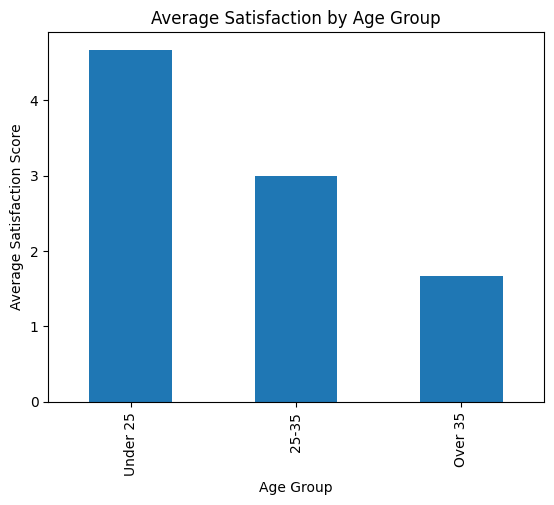

In [17]:
age_satisfaction.plot(kind="bar")
plt.title("Average Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Satisfaction Score")
plt.show()


### Interpretation

The visualization shows a clear decline in average satisfaction as age increases.  
This suggests that the app experience may be better optimized for younger users, while older users could be facing usability or engagement issues.
